In [1]:
#Laura Gouveia 9880200
#instalando o xlrd para mexer com o arquivo .xlrs
!pip install xlrd

In [2]:
import pandas as pd
import numpy as np
#importando as tabelas para o jupyter como dataframe
df = pd.read_excel("2018_all_indicators.xlsx", encoding='windows-1252')
#lendo o dataframe
df.head()

,dimension,indicator_id,indicator_name,iso3,country_name,1990,1991,1992,1993,1994,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,9999
0,Composite indices,146206,HDI rank,AFG,Afghanistan,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,168.0,168.0,NaN
1,Composite indices,146206,HDI rank,ALB,Albania,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.0,68.0,NaN
2,Composite indices,146206,HDI rank,DZA,Algeria,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83.0,85.0,NaN
3,Composite indices,146206,HDI rank,AND,Andorra,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.0,35.0,NaN
4,Composite indices,146206,HDI rank,AGO,Angola,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,145.0,147.0,NaN


In [3]:
#pegando algumas informações sobre o dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25636 entries, 0 to 25635
Data columns (total 34 columns):
dimension         25636 non-null object
indicator_id      25636 non-null int64
indicator_name    25636 non-null object
iso3              25636 non-null object
country_name      25636 non-null object
1990              10073 non-null float64
1991              7454 non-null float64
1992              5740 non-null float64
1993              5986 non-null float64
1994              5808 non-null float64
1995              13849 non-null float64
1996              6217 non-null float64
1997              6347 non-null float64
1998              6384 non-null float64
1999              6462 non-null float64
2000              16612 non-null float64
2001              7556 non-null float64
2002              7582 non-null float64
2003              7627 non-null float64
2004              7708 non-null float64
2005              17048 non-null float64
2006              12885 non-null float64
2007   

In [3]:
#percebe-se que tem muitos valores nulos, para a primeira parte do exercício
#porém, não são necessárias todas as colunas desse dataframe, então, vamos criar outro dataframe com as variaveis necessárias
#para a primeira parte
df2 = df.copy(deep=True)
df2.head()

,dimension,indicator_id,indicator_name,iso3,country_name,1990,1991,1992,1993,1994,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,9999
0,Composite indices,146206,HDI rank,AFG,Afghanistan,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,168.0,168.0,NaN
1,Composite indices,146206,HDI rank,ALB,Albania,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.0,68.0,NaN
2,Composite indices,146206,HDI rank,DZA,Algeria,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83.0,85.0,NaN
3,Composite indices,146206,HDI rank,AND,Andorra,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.0,35.0,NaN
4,Composite indices,146206,HDI rank,AGO,Angola,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,145.0,147.0,NaN


In [4]:
#deletando as colunas desnecessárias
#para a primeira parte do exercicio, será pego os anos mais próximos a 2014, isso é, de 2005 a 2014
colunas_desnecessarias = ["indicator_id", 1990,1991, 1992, 1993,1994, 1995, 1996, 1997,1998, 1999, 2000,
                           2001,2002, 2003, 2004,2015, 2016, 2017, 9999]
for coluna in colunas_desnecessarias:
    del df2[coluna]
df2.head()

,dimension,indicator_name,iso3,country_name,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,Composite indices,HDI rank,AFG,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Composite indices,HDI rank,ALB,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Composite indices,HDI rank,DZA,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Composite indices,HDI rank,AND,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Composite indices,HDI rank,AGO,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#com isso agora, temos um dataframe com os dados de 2014 a 2018, excluindo os primeiros anos
#vendo todos os indicadores
df2["indicator_name"].unique()

array(['HDI rank', 'Human Development Index (HDI)', 'Median age (years)',
       'Old-age (65 and older) dependency ratio (per 100 people ages 15-64)',
       'Population ages 15–64 (millions)',
       'Population ages 65 and older (millions)',
       'Population under age 5 (millions)',
       'Sex ratio at birth (male to female births)',
       'Total population (millions)', 'Urban population (%)',
       'Young age (0-14) dependency ratio (per 100 people ages 15-64)',
       'Education index', 'Expected years of schooling (years)',
       'Expected years of schooling, female (years)',
       'Expected years of schooling, male (years)',
       'Government expenditure on education (% of GDP)',
       'Gross enrolment ratio, pre-primary (% of preschool-age children)',
       'Gross enrolment ratio, primary (% of primary school-age population)',
       'Gross enrolment ratio, secondary (% of secondary school-age population)',
       'Gross enrolment ratio, tertiary (% of tertiary school

In [5]:
#localizando o IDH de todos os países, criando um dataframe novo o ordenando por IDH
df_idh = df2.loc[df2["indicator_name"] == 'Human Development Index (HDI)'].copy(deep=True)
df_idh = df_idh.sort_values(by=[2014])
df_idh.head()

,dimension,indicator_name,iso3,country_name,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
313,Composite indices,Human Development Index (HDI),NER,Niger,0.282,0.289,0.294,0.303,0.308,0.318,0.325,0.336,0.340,0.345
221,Composite indices,Human Development Index (HDI),CAF,Central African Republic,0.319,0.325,0.331,0.337,0.343,0.351,0.358,0.365,0.344,0.349
346,Composite indices,Human Development Index (HDI),SSD,South Sudan,NaN,NaN,NaN,NaN,NaN,0.413,0.416,0.388,0.392,0.397
222,Composite indices,Human Development Index (HDI),TCD,Chad,0.330,0.332,0.342,0.348,0.363,0.371,0.382,0.391,0.397,0.403
215,Composite indices,Human Development Index (HDI),BFA,Burkina Faso,0.324,0.333,0.344,0.357,0.366,0.375,0.385,0.394,0.401,0.405


In [6]:
#localizando a posição do Brasil
brazil_position = df_idh.index.get_indexer_for((df_idh.loc[df_idh["country_name"] == "Brazil"].index))
brazil_position

array([108], dtype=int64)

In [7]:
#Logo, o Brasil está na posição 108 dessa tabela
#Pegando uma range maior, é possível determinar quais países estão próximos do Brasil
df_idh.iloc[105:111,:]

,dimension,indicator_name,iso3,country_name,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
191,Composite indices,Human Development Index (HDI),DZA,Algeria,0.692,0.698,0.707,0.709,0.719,0.729,0.736,0.740,0.745,0.747
366,Composite indices,Human Development Index (HDI),UKR,Ukraine,0.715,0.721,0.729,0.733,0.727,0.733,0.738,0.743,0.745,0.748
284,Composite indices,Human Development Index (HDI),LBN,Lebanon,0.732,0.731,0.743,0.750,0.756,0.758,0.760,0.751,0.751,0.751
212,Composite indices,Human Development Index (HDI),BRA,Brazil,0.700,0.702,0.705,0.716,0.718,0.727,0.731,0.736,0.748,0.752
210,Composite indices,Human Development Index (HDI),BIH,Bosnia and Herzegovina,0.700,0.706,0.712,0.719,0.720,0.713,0.721,0.739,0.747,0.754
199,Composite indices,Human Development Index (HDI),AZE,Azerbaijan,0.679,0.704,0.709,0.719,0.736,0.740,0.741,0.745,0.752,0.758


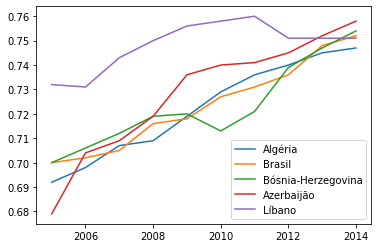

In [8]:
#Serão utilizados esses 5 países para comparação com o Brasil
import matplotlib.pyplot as plt
colunas_desejadas = [2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014]
paises_desejados = ["Algeria", "Brazil", "Bosnia and Herzegovina", "Azerbaijan", "Lebanon"]
df_igual = df_idh[df_idh["country_name"].isin(paises_desejados)].copy(deep = True)
fig, ax = plt.subplots()
renomear = {
        191: "Algéria",
        366: "Ucrânia",
        284: "Líbano",
        212: "Brasil",
        210:  "Bósnia-Herzegovina",
        199: "Azerbaijão",
}
#plotando o gráfico do idh
df_igual = df_igual.rename(index = renomear)
for pais in paises_desejados:
        df_igual.loc[df_igual["country_name"] == pais, colunas_desejadas].T.plot(ax=ax)

        

In [9]:
#com os países já escolhidos, agora vamos ver os indicadores que poderão ser usados no análise
df2["indicator_name"].unique()

array(['HDI rank', 'Human Development Index (HDI)', 'Median age (years)',
       'Old-age (65 and older) dependency ratio (per 100 people ages 15-64)',
       'Population ages 15–64 (millions)',
       'Population ages 65 and older (millions)',
       'Population under age 5 (millions)',
       'Sex ratio at birth (male to female births)',
       'Total population (millions)', 'Urban population (%)',
       'Young age (0-14) dependency ratio (per 100 people ages 15-64)',
       'Education index', 'Expected years of schooling (years)',
       'Expected years of schooling, female (years)',
       'Expected years of schooling, male (years)',
       'Government expenditure on education (% of GDP)',
       'Gross enrolment ratio, pre-primary (% of preschool-age children)',
       'Gross enrolment ratio, primary (% of primary school-age population)',
       'Gross enrolment ratio, secondary (% of secondary school-age population)',
       'Gross enrolment ratio, tertiary (% of tertiary school

In [10]:
#criando uma função para separar a tabela por categoria escolhida
def tabelar_por_categoria(tabela_principal, indicador, paises_desejados):
    tabela_aux = tabela_principal[tabela_principal["indicator_name"] == indicador]
    tabela_final = tabela_aux[tabela_aux["country_name"].isin(paises_desejados)].copy(deep = True)
    return tabela_final
#exemplo
df_inf = tabelar_por_categoria(df2, 'Infants lacking immunization, DPT (% of one-year-olds)', paises_desejados)
df_inf.head()

,dimension,indicator_name,iso3,country_name,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
11751,Health,"Infants lacking immunization, DPT (% of one-ye...",DZA,Algeria,6.0,2.0,2.0,3.0,2.0,1.0,1.0,1.0,1.0,1.0
11759,Health,"Infants lacking immunization, DPT (% of one-ye...",AZE,Azerbaijan,19.0,14.0,13.0,10.0,10.0,6.0,6.0,6.0,5.0,4.0
11770,Health,"Infants lacking immunization, DPT (% of one-ye...",BIH,Bosnia and Herzegovina,5.0,6.0,4.0,5.0,5.0,5.0,6.0,5.0,6.0,8.0
11772,Health,"Infants lacking immunization, DPT (% of one-ye...",BRA,Brazil,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0
11844,Health,"Infants lacking immunization, DPT (% of one-ye...",LBN,Lebanon,17.0,16.0,16.0,16.0,15.0,15.0,14.0,14.0,13.0,18.0


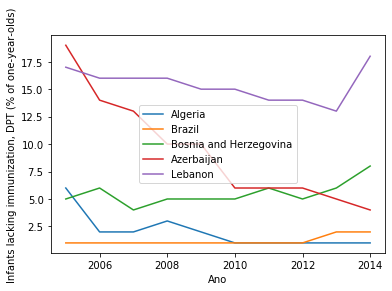

In [11]:
#criando uma função para ajustar o index dessa tabela criada
fig, ax = plt.subplots()
def calcular_index(tabela, coluna):
    new_index = tabela[coluna]
    return tabela.rename(new_index)
#criando uma função para plotar essa nova tabela com a legenda e o nome nos eixos corretamente
def tracar_grafico(tabela, paises_desejados, colunas_desejadas, ax, index = False):
    if index:
        tabela = calcular_index(tabela,"country_name")
    for pais in paises_desejados:
        if pais in tabela.index:
            tabela.loc[tabela["country_name"] == pais, colunas_desejadas].T.plot(ax=ax)
    plt.xlabel("Ano")
    plt.ylabel(tabela["indicator_name"][0])
    plt.show()
tracar_grafico(df_inf, paises_desejados, colunas_desejadas, ax, index=renomear)

In [ ]:
### Agora, com as funções para separar os países escolhidos para cada categoria escolhida e traçar o gráfico estão feitas
### basta escolher as categorias e plotar os gráficos

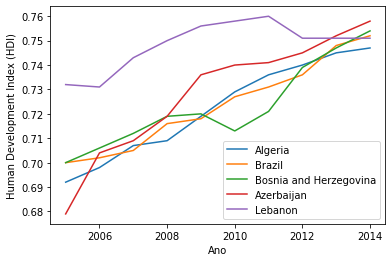

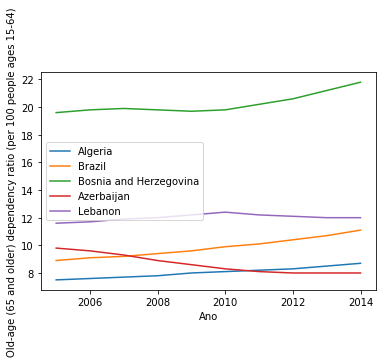

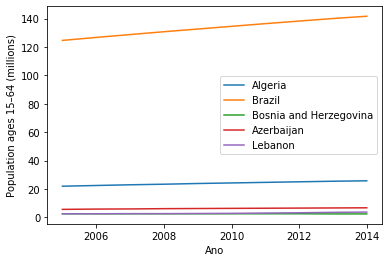

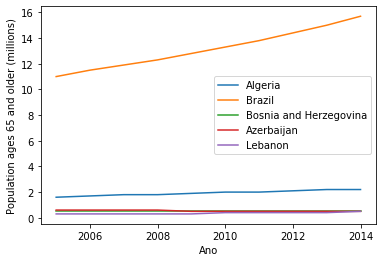

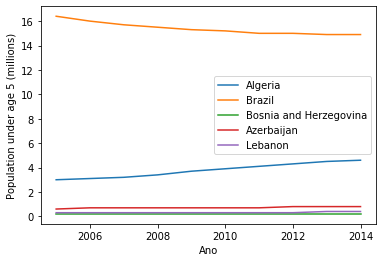

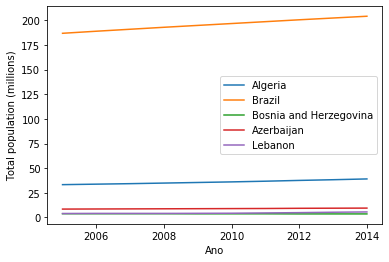

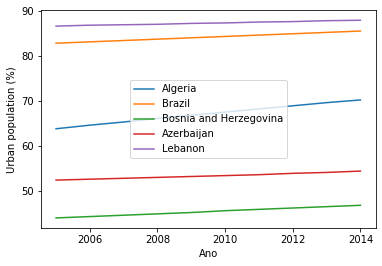

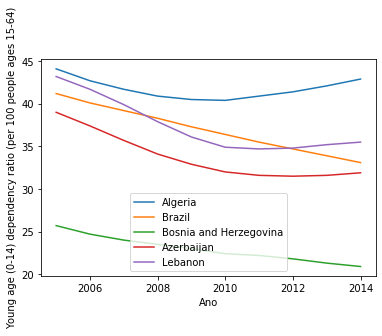

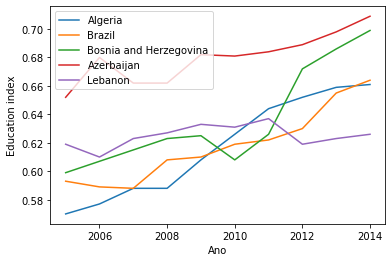

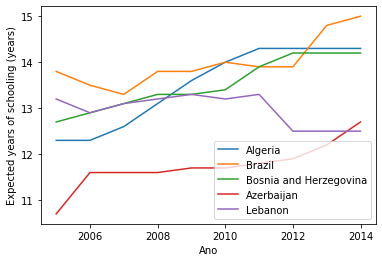

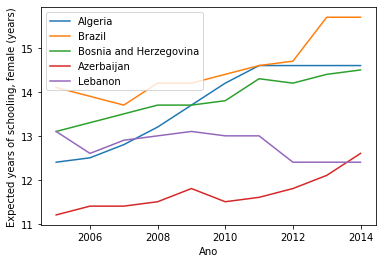

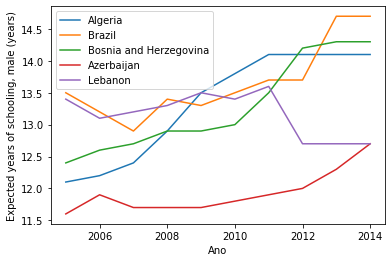

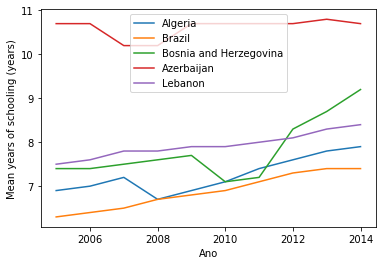

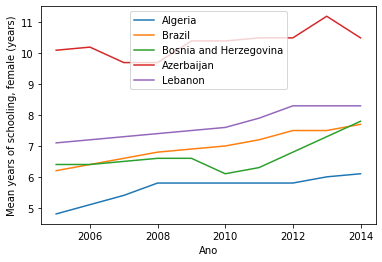

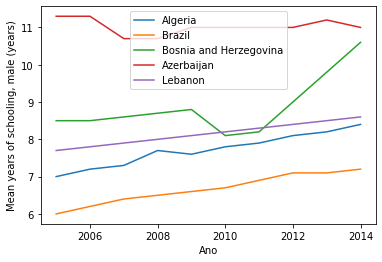

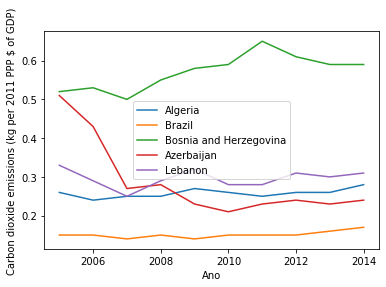

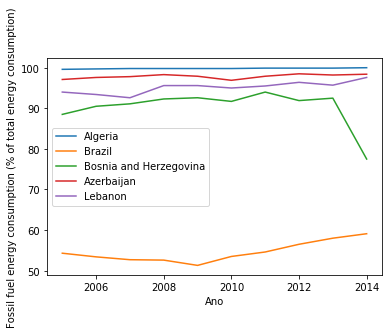

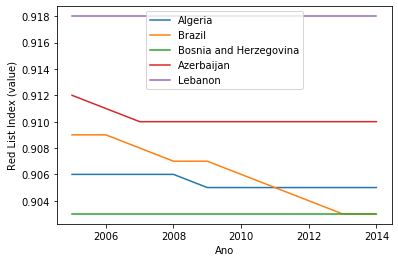

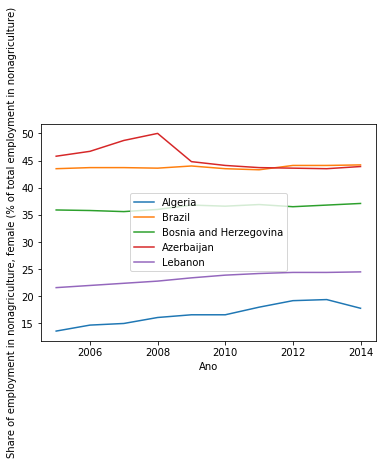

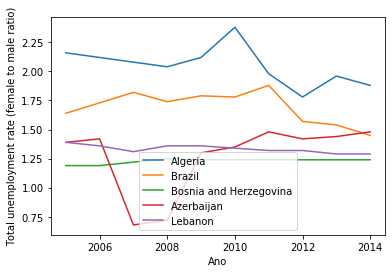

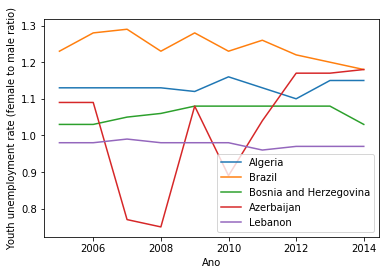

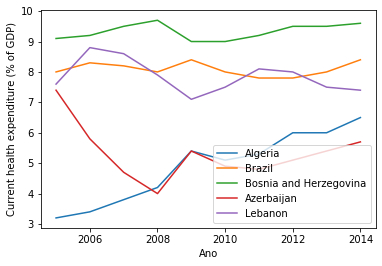

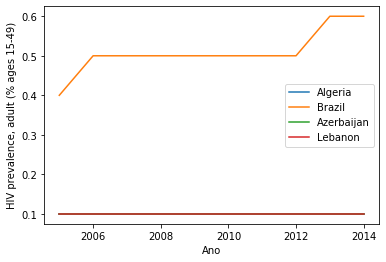

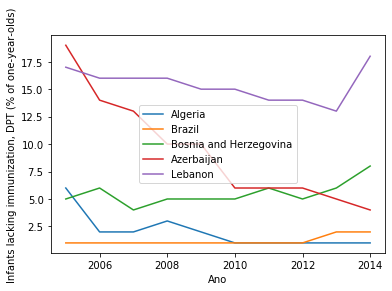

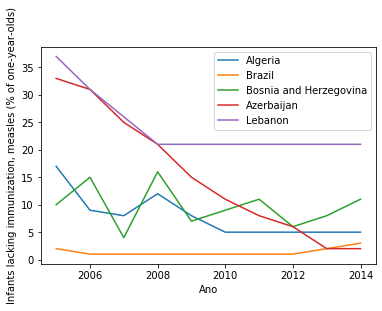

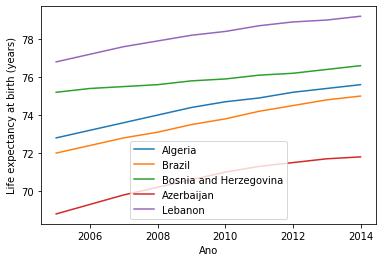

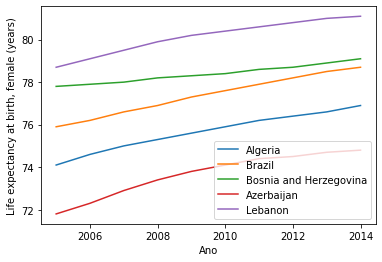

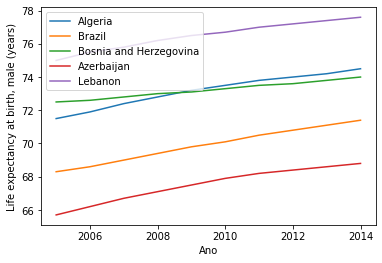

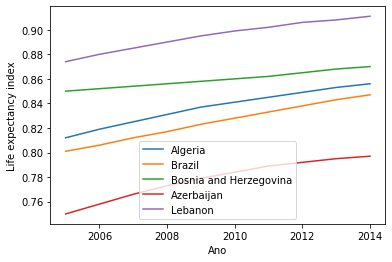

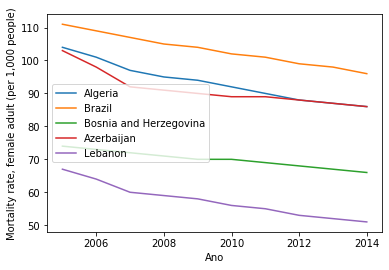

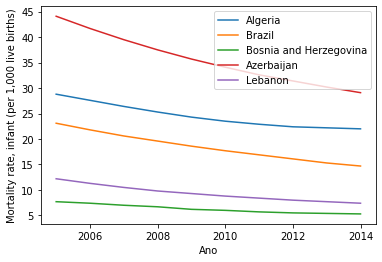

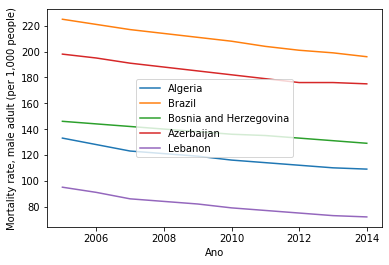

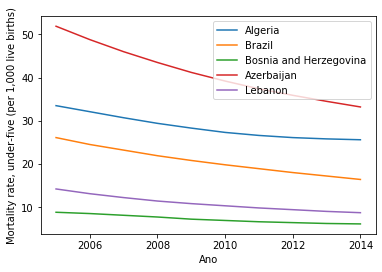

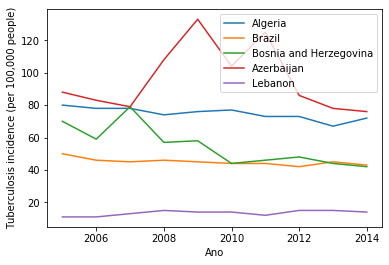

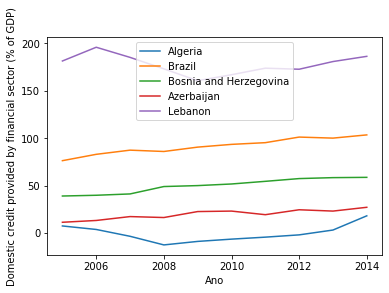

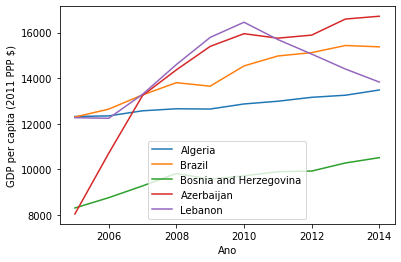

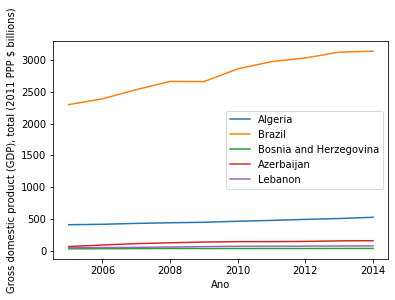

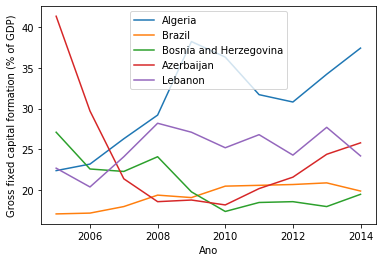

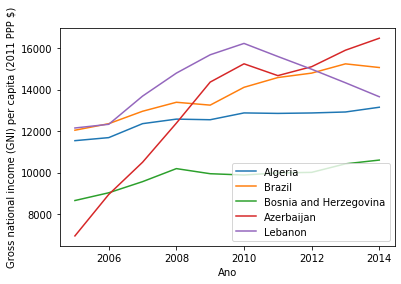

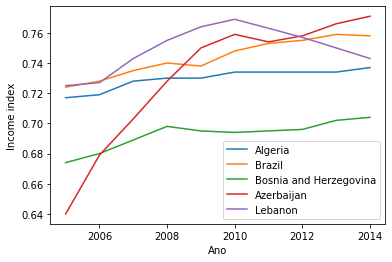

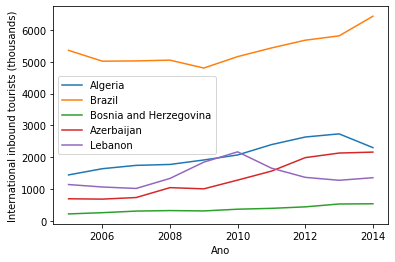

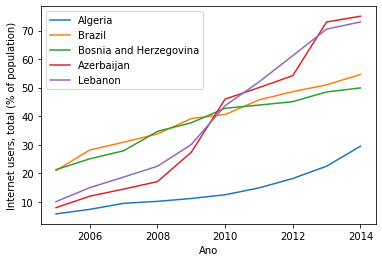

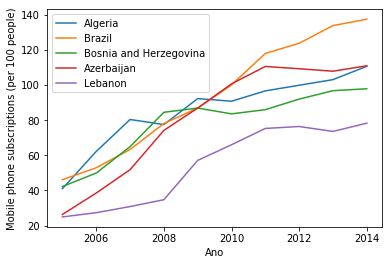

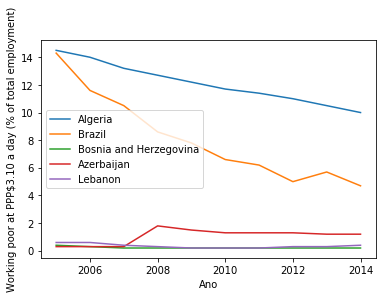

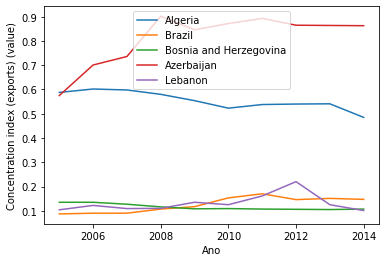

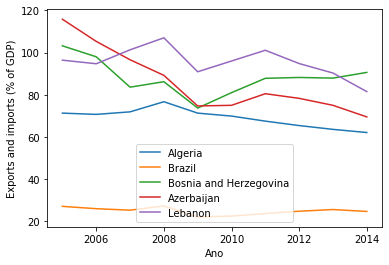

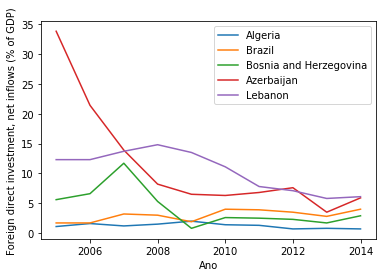

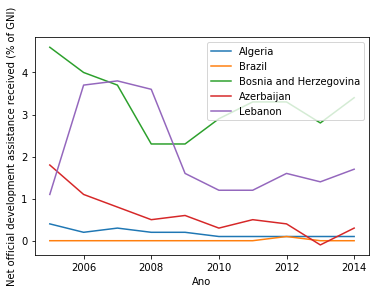

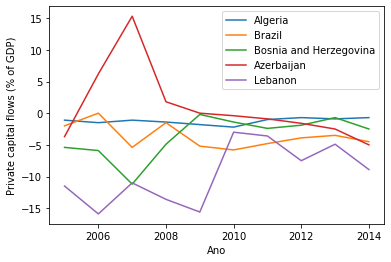

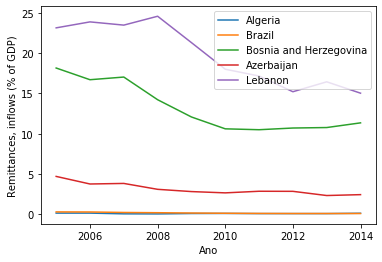

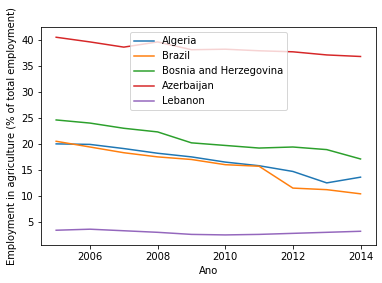

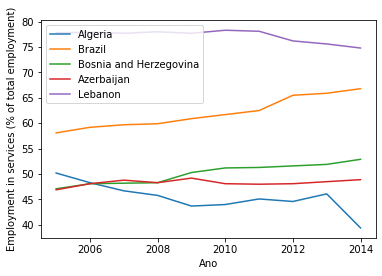

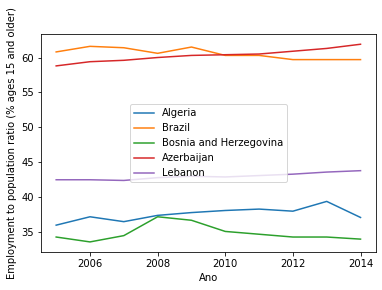

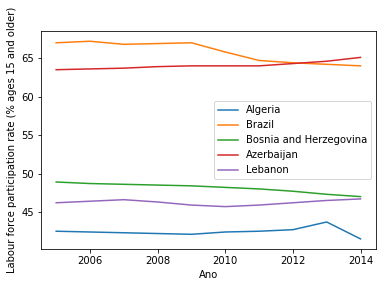

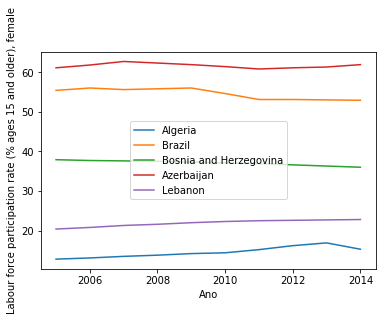

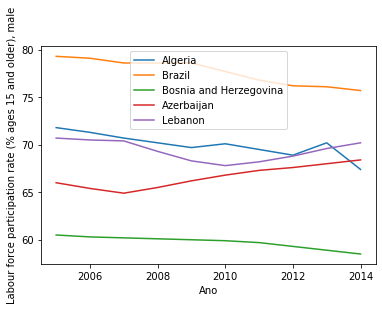

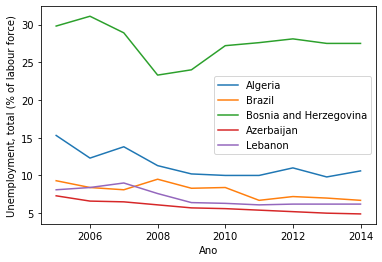

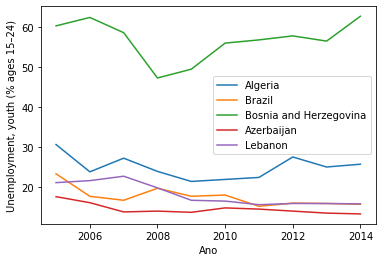

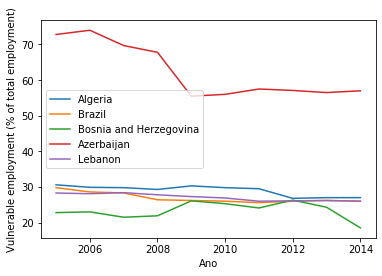

In [12]:
#utilizando todos os indicadores para ver se há alguma relação relevante, excluindo as tabelas com valores nulos
categorias_escolhidas = df2["indicator_name"].unique()
for categoria in categorias_escolhidas:
    tabela = tabelar_por_categoria(df2, categoria, paises_desejados)
    if not tabela.isnull().any().any() and len(tabela.index) != 0:
        fig, ax = plt.subplots()
        tracar_grafico(tabela, paises_desejados, colunas_desejadas, ax, index = True)

In [15]:
#comparando a porcentagem da população por idade
categorias_idade = ['Population ages 15–64 (millions)',
       'Population ages 65 and older (millions)',
       'Population under age 5 (millions)',
       'Total population (millions)']
#criando as tabelas por idade mais a tabela com a população total
tabela_idade = [tabelar_por_categoria(df2, categoria, paises_desejados) for categoria in categorias_idade]
#com as tabelas na mão, devemos calcular as porcentagens de cada categoria para 
#ter uma noção melhor da idade média dessas populações
anos_usados = [i for i in range(2005, 2015)]
tabela_idade_per = []
tabela_idade[3] = calcular_index(tabela_idade[3],"country_name")
for tabela in tabela_idade:
    tabela = calcular_index(tabela,"country_name")
    tabela[anos_usados] = tabela[anos_usados]/tabela_idade[3][anos_usados]
    tabela_idade_per.append(tabela)
tabela_idade_per[0]["indicator_name"] = 'Population ages 15–64 (%)'
tabela_idade_per[1]["indicator_name"] = 'Population ages 65 and older (%)'
tabela_idade_per[2]["indicator_name"] = 'Population under age 5 (%)'

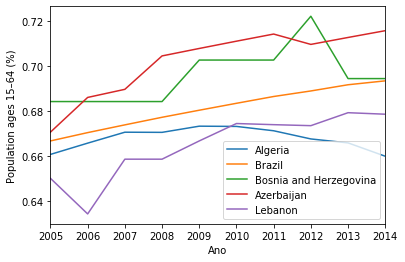

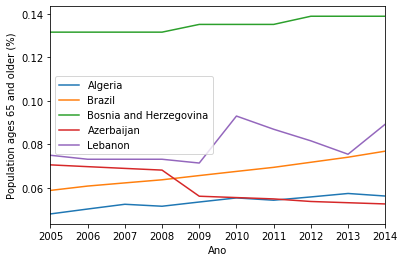

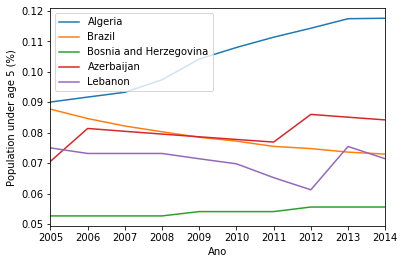

In [16]:
#traçando esses novos gráficos, com as novas categorias:
categorias_idade_novas = ['Population ages 15–64 (%)',
       'Population ages 65 and older (%)',
       'Population under age 5 (%)']
for k,categoria in enumerate(categorias_idade_novas):
    fig, ax = plt.subplots()
    tracar_grafico(tabela_idade_per[k], paises_desejados, colunas_desejadas, ax, index = True)


In [17]:
#agora checando para países com idh afastados do Brasil
#como o Brasil está na posição 108, será pego a posição 50-55

paises_escolhidos = df_idh[160:165]
paises_escolhidos

,dimension,indicator_name,iso3,country_name,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
272,Composite indices,Human Development Index (HDI),ITA,Italy,0.857,0.862,0.866,0.868,0.868,0.870,0.875,0.874,0.876,0.874
234,Composite indices,Human Development Index (HDI),CZE,Czechia,0.835,0.843,0.850,0.854,0.857,0.862,0.865,0.865,0.874,0.879
347,Composite indices,Human Development Index (HDI),ESP,Spain,0.844,0.848,0.853,0.856,0.858,0.865,0.870,0.873,0.875,0.880
343,Composite indices,Human Development Index (HDI),SVN,Slovenia,0.861,0.869,0.873,0.878,0.878,0.882,0.884,0.877,0.885,0.887
249,Composite indices,Human Development Index (HDI),FRA,France,0.869,0.874,0.876,0.878,0.878,0.882,0.884,0.886,0.889,0.894


In [18]:
#será refeito as mesmas estatisticas, agora adicionando também o Brasil aos países escolhidos para comparar
paises_escolhidos = list(df_idh["country_name"][160:165])
paises_escolhidos.append("Brazil")
print(paises_escolhidos)

['Italy', 'Czechia', 'Spain', 'Slovenia', 'France', 'Brazil']


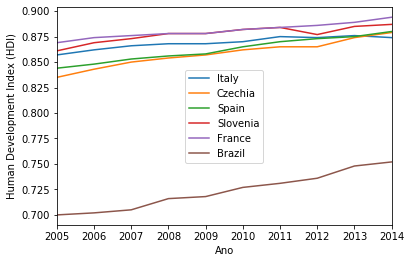

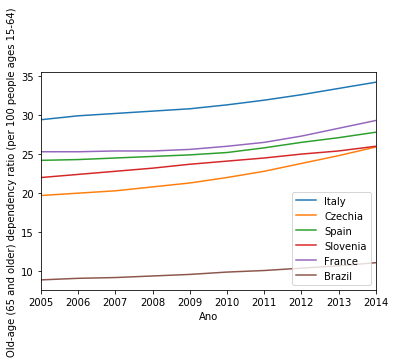

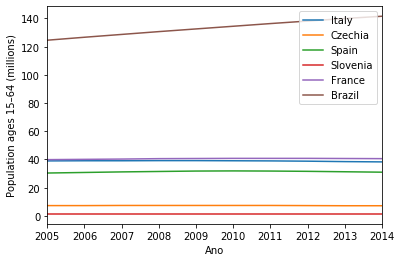

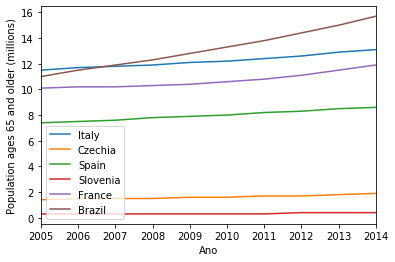

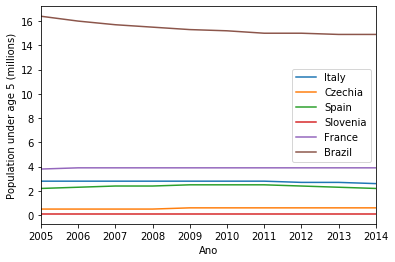

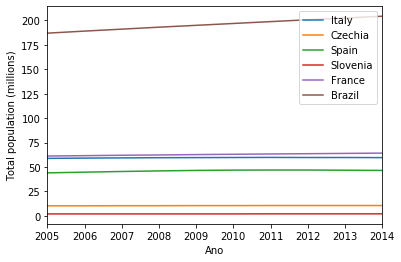

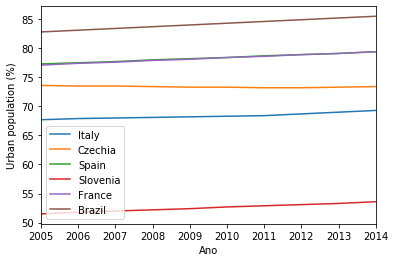

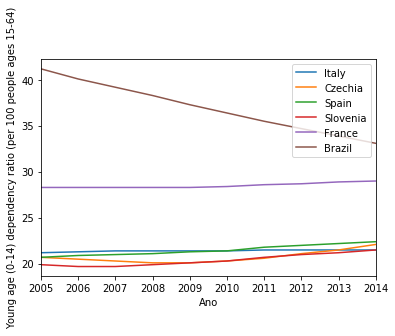

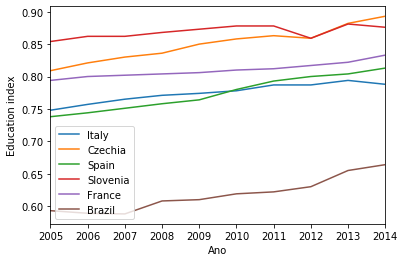

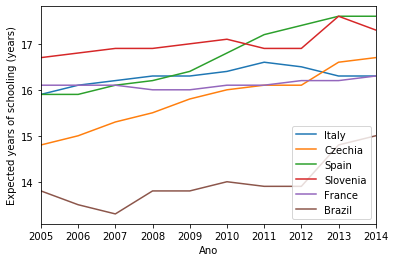

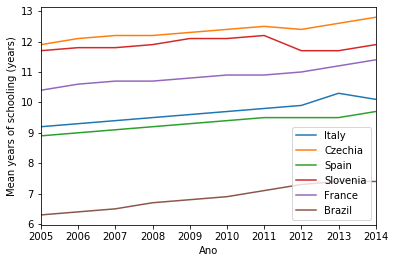

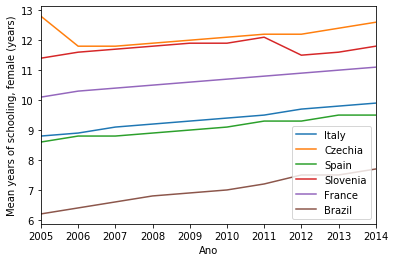

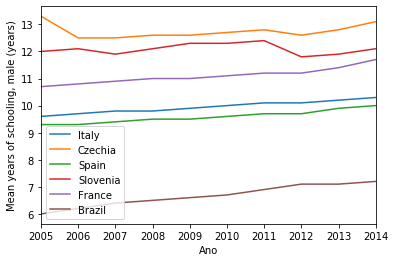

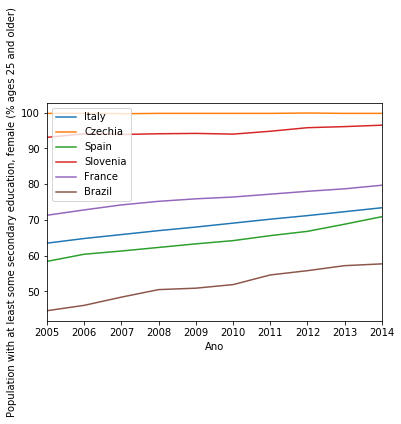

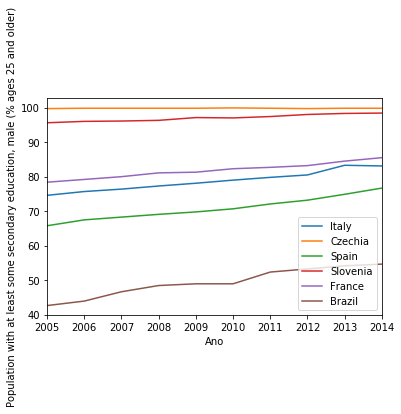

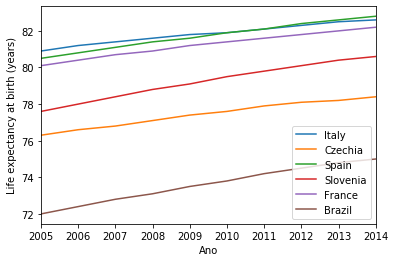

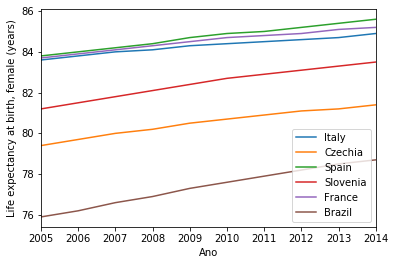

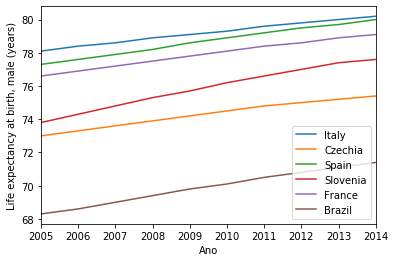

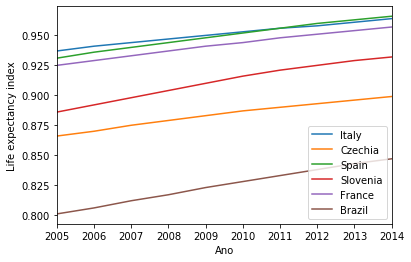

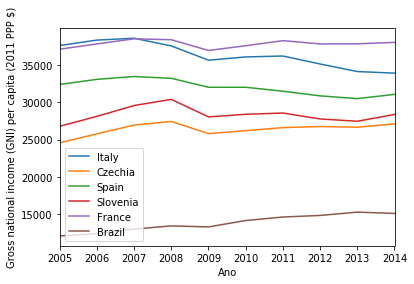

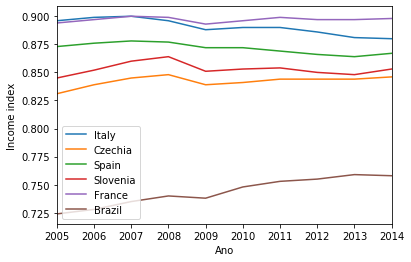

In [564]:
#com isso, pegaremos as funções tabelar_por_categoria e tracar_grafico para comparar os dados 
categorias_escolhidas = df2["indicator_name"].unique()
colunas_desejadas = [2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014]
for categoria in categorias_escolhidas:
    tabela = tabelar_por_categoria(df2, categoria, paises_escolhidos)
    if not tabela.isnull().any().any() and len(tabela.index) != 0:
        fig, ax = plt.subplots()
        tracar_grafico(tabela, paises_escolhidos, colunas_desejadas, ax, index = True)

In [19]:
#comparando a porcentagem da população por idade
categorias_idade = ['Population ages 15–64 (millions)',
       'Population ages 65 and older (millions)',
       'Population under age 5 (millions)',
       'Total population (millions)']
#criando as tabelas por idade mais a tabela com a população total
tabela_idade = [tabelar_por_categoria(df2, categoria, paises_escolhidos) for categoria in categorias_idade]
#com as tabelas na mão, devemos calcular as porcentagens de cada categoria para 
#ter uma noção melhor da idade média dessas populações
anos_usados = [i for i in range(2005, 2015)]
tabela_idade_per = []
tabela_idade[3] = calcular_index(tabela_idade[3],"country_name")
for tabela in tabela_idade:
    tabela = calcular_index(tabela,"country_name")
    tabela[anos_usados] = tabela[anos_usados]/tabela_idade[3][anos_usados]
    tabela_idade_per.append(tabela)
tabela_idade_per[0]["indicator_name"] = 'Population ages 15–64 (%)'
tabela_idade_per[1]["indicator_name"] = 'Population ages 65 and older (%)'
tabela_idade_per[2]["indicator_name"] = 'Population under age 5 (%)'
tabela_idade_per[2]

,dimension,indicator_name,iso3,country_name,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
Brazil,Demography,Population under age 5 (%),BRA,Brazil,0.087747,0.084656,0.082199,0.080311,0.078502,0.077236,0.075491,0.074776,0.073617,0.072968
Czechia,Demography,Population under age 5 (%),CZE,Czechia,0.048544,0.048544,0.048077,0.048077,0.057143,0.057143,0.056604,0.056604,0.056604,0.056604
France,Demography,Population under age 5 (%),FRA,France,0.062092,0.063312,0.062903,0.062600,0.062201,0.061905,0.061611,0.061321,0.061033,0.060748
Italy,Demography,Population under age 5 (%),ITA,Italy,0.047619,0.047377,0.047218,0.047059,0.046980,0.046901,0.046823,0.045226,0.045226,0.043624
Slovenia,Demography,Population under age 5 (%),SVN,Slovenia,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.047619,0.047619,0.047619,0.047619
Spain,Demography,Population under age 5 (%),ESP,Spain,0.050000,0.051454,0.052863,0.052174,0.053763,0.053419,0.053305,0.051173,0.049251,0.047312


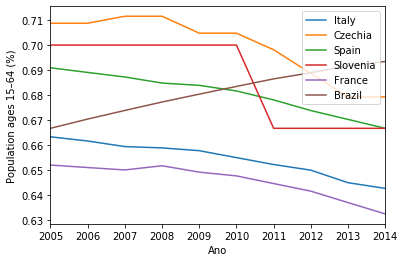

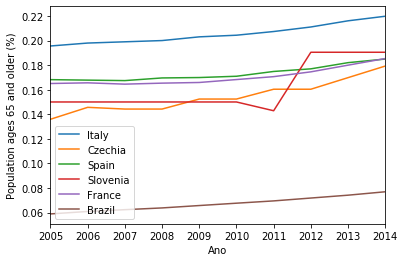

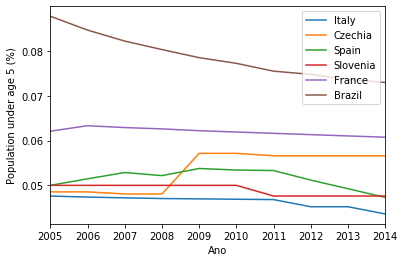

In [20]:
#traçando esses novos gráficos, com as novas categorias:
categorias_idade_novas = ['Population ages 15–64 (%)',
       'Population ages 65 and older (%)',
       'Population under age 5 (%)']
for k,categoria in enumerate(categorias_idade_novas):
    fig, ax = plt.subplots()
    tracar_grafico(tabela_idade_per[k], paises_escolhidos, colunas_desejadas, ax, index = True)


In [22]:
categoria_grau = ['Population with at least some secondary education, female (% ages 25 and older)',
       'Population with at least some secondary education, male (% ages 25 and older)',]

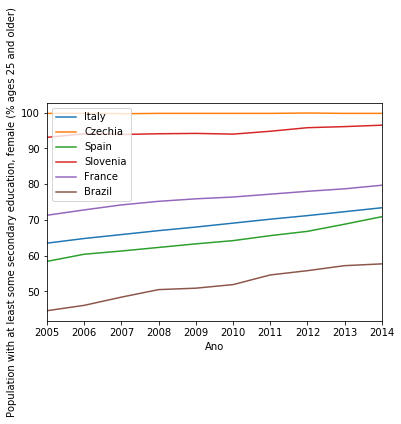

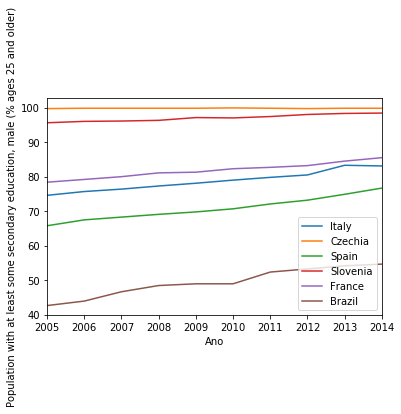

In [23]:
#com isso, pegaremos as funções tabelar_por_categoria e tracar_grafico para comparar os dados 
categorias_desejadas = [2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014]
for categoria in categoria_grau:
    tabela = tabelar_por_categoria(df2, categoria, paises_escolhidos)
    if not tabela.isnull().any().any() and len(tabela.index) != 0:
        fig, ax = plt.subplots()
        tracar_grafico(tabela, paises_escolhidos, colunas_desejadas, ax, index = True)